<h1> Imports </h1>

In [ ]:
# Install fastai
#!pip3 install fastai
#pip install azure-storage-blob
#!pip3 install torchvision
#!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
#!pip3 install torchvision
#!pip install pytorch


In [15]:
# This file contains all the main external libs we'll use
from fastai.vision.all import *
import os
from azure.storage.blob import BlobServiceClient,ContainerClient, BlobClient
import datetime
import shutil
import numpy as np

In [ ]:
shutil.rmtree("Mais")

In [ ]:
# Retrieve the connection string for use with the application. The storage
# connection string is stored in an environment variable on the machine
# running the application called AZURE_STORAGE_CONNECTION_STRING. If the environment variable is
# created after the application is launched in a console or with Visual Studio,
# the shell or application needs to be closed and reloaded to take the
# environment variable into account.
connect_str = os.getenv('DefaultEndpointsProtocol=https;AccountName=storagemainfotosplanten;AccountKey=YHIqjHCcXi8IO3DabS+N1lRzrBoltBaDDofu9vJmMo2tMQghoHMQ8fKT/GXVD0Q569EW8pfuJVqv7CjVkPreVA==;EndpointSuffix=core.windows.net')

In [16]:
# download_blobs.py
# Python program to bulk download blob files from azure storage
# Uses latest python SDK() for Azure blob storage
# Requires python 3.6 or above
import os
from azure.storage.blob import BlobServiceClient, BlobClient
from azure.storage.blob import ContentSettings, ContainerClient
if os.path.exists("Mais") and os.path.isdir("Mais"):
  shutil.rmtree("Mais")
os.mkdir("Mais") 

# IMPORTANT: Replace connection string with your storage account connection string
# Usually starts with DefaultEndpointsProtocol=https;...
MY_CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=storagemainfotosplanten;AccountKey=YHIqjHCcXi8IO3DabS+N1lRzrBoltBaDDofu9vJmMo2tMQghoHMQ8fKT/GXVD0Q569EW8pfuJVqv7CjVkPreVA==;EndpointSuffix=core.windows.net"
for x in range(5):
  x = x+1
  # Replace with blob container
  MY_BLOB_CONTAINER = "week" + str(x)
  path = "Mais/" + str(x)
  if os.path.exists(path) and os.path.isdir(path):
    shutil.rmtree(path)
  os.mkdir(path)
  # Replace with the local folder where you want files to be downloaded
  LOCAL_BLOB_PATH = path
  
  class AzureBlobFileDownloader:
    def __init__(self):
      print("Intializing AzureBlobFileDownloader")
  
      # Initialize the connection to Azure storage account
      self.blob_service_client =  BlobServiceClient.from_connection_string(MY_CONNECTION_STRING)
      self.my_container = self.blob_service_client.get_container_client(MY_BLOB_CONTAINER)
  
  
    def save_blob(self,file_name,file_content):
      # Get full path to the file
      download_file_path = os.path.join(LOCAL_BLOB_PATH, file_name)
  
      # for nested blobs, create local path as well!
      os.makedirs(os.path.dirname(download_file_path), exist_ok=True)
  
      with open(download_file_path, "wb") as file:
        file.write(file_content)
  
    def download_all_blobs_in_container(self):
      my_blobs = self.my_container.list_blobs()
      for blob in my_blobs:
        print(blob.name)
        bytes = self.my_container.get_blob_client(blob).download_blob().readall()
        self.save_blob(blob.name, bytes)
  
  # Initialize class and upload files
  azure_blob_file_downloader = AzureBlobFileDownloader()
  azure_blob_file_downloader.download_all_blobs_in_container()

Intializing AzureBlobFileDownloader
Plantjes_week_1 (1).JPG
Plantjes_week_1 (10).JPG
Plantjes_week_1 (11).JPG
Plantjes_week_1 (12).JPG
Plantjes_week_1 (13).JPG
Plantjes_week_1 (14).JPG
Plantjes_week_1 (15).JPG
Plantjes_week_1 (16).JPG
Plantjes_week_1 (17).JPG
Plantjes_week_1 (18).JPG
Plantjes_week_1 (19).JPG
Plantjes_week_1 (2).JPG
Plantjes_week_1 (20).JPG
Plantjes_week_1 (21).JPG
Plantjes_week_1 (22).JPG
Plantjes_week_1 (23).JPG
Plantjes_week_1 (24).JPG
Plantjes_week_1 (25).JPG
Plantjes_week_1 (26).JPG
Plantjes_week_1 (27).JPG
Plantjes_week_1 (28).JPG
Plantjes_week_1 (29).JPG
Plantjes_week_1 (3).JPG
Plantjes_week_1 (30).JPG
Plantjes_week_1 (31).JPG
Plantjes_week_1 (32).JPG
Plantjes_week_1 (33).JPG
Plantjes_week_1 (4).JPG
Plantjes_week_1 (5).JPG
Plantjes_week_1 (6).JPG
Plantjes_week_1 (7).JPG
Plantjes_week_1 (8).JPG
Plantjes_week_1 (9).JPG
Intializing AzureBlobFileDownloader
Plantjes_week_2 (1).JPG
Plantjes_week_2 (10).JPG
Plantjes_week_2 (11).JPG
Plantjes_week_2 (12).JPG
Plantjes_week

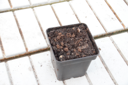

In [17]:
from PIL import Image
path = 'Mais/'
im = Image.open(path + '1\Plantjes_week_1 (1).JPG')
im.to_thumb(128,128)

In [18]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#177) [Path('Mais/1/Plantjes_week_1 (1).JPG'),Path('Mais/1/Plantjes_week_1 (10).JPG'),Path('Mais/1/Plantjes_week_1 (11).JPG'),Path('Mais/1/Plantjes_week_1 (12).JPG'),Path('Mais/1/Plantjes_week_1 (13).JPG'),Path('Mais/1/Plantjes_week_1 (14).JPG'),Path('Mais/1/Plantjes_week_1 (15).JPG'),Path('Mais/1/Plantjes_week_1 (16).JPG'),Path('Mais/1/Plantjes_week_1 (17).JPG'),Path('Mais/1/Plantjes_week_1 (18).JPG')...]

In [19]:
failed = verify_images(filenames)
failed

(#0) []

In [20]:
Mais = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


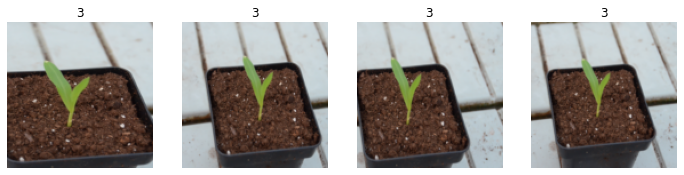

In [21]:
Mais = Mais.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Mais.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [22]:
our_out_of_the_box_model = cnn_learner(dls, resnet50, metrics=error_rate)
our_out_of_the_box_model.fine_tune(4)

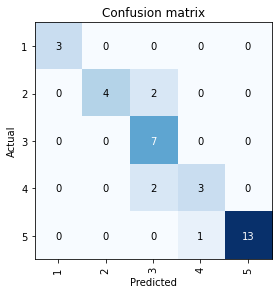

In [23]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()

In [24]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)

def plot_top_losses_fix( interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)



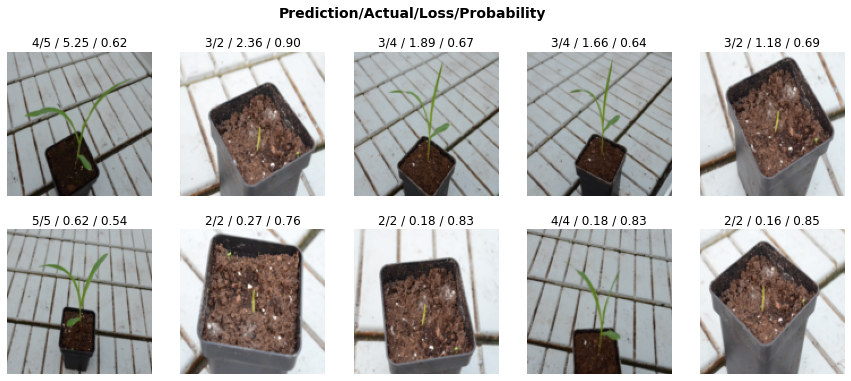

In [25]:
plot_top_losses_fix(interp, 10, nrows=2)

In [34]:
# saving our model, by default in a folder called 'models'.
our_out_of_the_box_model.save('API model')
#creating an serialized pickle object of our model, the export.pkl file
our_out_of_the_box_model.export()

In [63]:
import flask
from flask import request, jsonify
import requests

In [73]:
our_out_of_the_box_model_inference = load_learner('export.pkl')
response = requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQo6ie4rkxLjZ6fhFZgrpsZjQ3KFi4HnNezQ&usqp=CAU")

(our_out_of_the_box_model_inference.predict(response.content))


('2', TensorBase(1), TensorBase([0.0409, 0.8953, 0.0098, 0.0011, 0.0528]))

In [76]:
app = flask.Flask(__name__)
our_out_of_the_box_model_inference = load_learner('export.pkl')
# let's test our model on an image
#our_out_of_the_box_model_inference = load_learner('models\first_model.pth')

#app.config["DEBUG"] = True

@app.route('/', methods=['GET'])
def home():
    if request.method == 'GET':
        link = request.args.get('link')
        response = requests.get(link)
        stringwaardepred = str(max(our_out_of_the_box_model_inference.predict(response.content)[2]))
# Create some test data for our catalog in the form of a list of dictionaries.
        Output = {'output': int(our_out_of_the_box_model_inference.predict(response.content)[0]) -1,
        'accuracy': float(stringwaardepred[11:-1])*100
        }


    return jsonify(Output)
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


127.0.0.1 - - [20/Jan/2022 14:52:13] "GET /?link=https://www.eatpurelove.nl/wp-content/uploads/2014/01/Spelt-versus-tarwe-1-1024x683.jpg HTTP/1.1" 200 -


127.0.0.1 - - [20/Jan/2022 14:53:58] "GET /?link=https://storagemainfotosplanten.blob.core.windows.net/greenhealth/u1p2.JPG HTTP/1.1" 200 -
